# customer churn prediction using logistic regression

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
churn=pd.read_csv("Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
churn.shape

(10000, 14)

In [9]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
churn.drop("RowNumber",axis=1,inplace=True)

In [11]:
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
churn.drop("CustomerId",axis=1,inplace=True)

In [16]:
churn

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
churn["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
churn["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

churn["Geography"]=le.fit_transform(churn["Geography"])
churn["Gender"]=le.fit_transform(churn["Gender"])

In [20]:
churn

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [21]:
churn["Surname"]=le.fit_transform(churn["Surname"])

In [22]:
churn

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:xlabel='Exited', ylabel='count'>

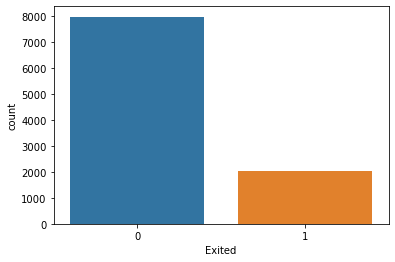

In [24]:
sns.countplot(x=churn["Exited"])

In [26]:
churn.describe()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1507.774200,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,846.204311,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,0.000000,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,773.750000,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1542.000000,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,2238.250000,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,2931.000000,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

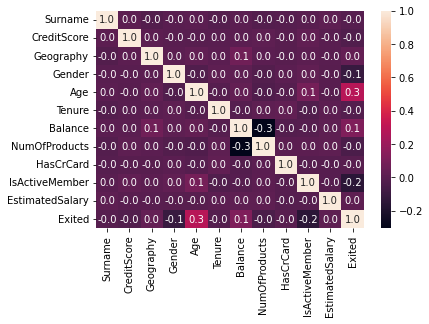

In [28]:
sns.heatmap(churn.corr(),annot=True,fmt="0.1f")

In [30]:
churn.select_dtypes("object")

""
0
1
2
3
4
...
9995
9996
9997
9998


In [31]:
X=churn.iloc[:,:-1]
Y=churn.iloc[:,-1]
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x1,y1)

LogisticRegression()